## 2.1. Problem Statement: Numpy

### Problem Statement 1:
#### Write a function so that the columns of the output matrix are powers of
#### the input vector.
#### The order of the powers is determined by the increasing boolean argument. Specifically, when
#### increasing is False, the i-th output column is the input vector raised element-wise to the power
#### of N - i - 1.

#### HINT: Such a matrix with a geometric progression in each row is named for Alexandre-
#### Theophile Vandermonde.

In [ ]:
def vander(x, N=None, increasing=False):
    return

In [5]:
import numpy as np
x= np.array([1, 2, 3, 5])
N = 3
np.vander(x, N)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]])

In [18]:
 '''Or we can do the same problem using column_stack function, which is a inbuild function in numpy
the syntax for columns_stack is written below '''
          
import numpy as np
x= np.array([1, 2, 3, 5])
N = 3
print(np.column_stack([x**(N-1-i) for i in range(N)]))

#or
print("\n")
print(np.vstack([x**(N-1-i) for i in range(N)]).T)


[[ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]
 [25  5  1]]


[[ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]
 [25  5  1]]


#### Problem Statement 2:
#### Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average
#### of the given sequence is defined as follows:
#### The moving average sequence has n-k+1 elements as shown below.
#### The moving averages with k=4 of a ten-value sequence (n=10) is shown below
#### i 1 2 3 4 5 6 7 8 9 10
#### ===== == == == == == == == == == ==
#### Input 10 20 30 40 50 60 70 80 90 100
#### y1 25 = (10+20+30+40)/4
#### y2 35 = (20+30+40+50)/4
#### y3 45 = (30+40+50+60)/4
#### y4 55 = (40+50+60+70)/4
#### y5 65 = (50+60+70+80)/4
#### y6 75 = (60+70+80+90)/4
#### y7 85 = (70+80+90+100)/4
#### Thus, the moving average sequence has n-k+1=10-4+1=7 values.

#### Question: Write a function to find moving average in an array over a window:
##### Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [10]:
def moving_average(a, n=3) :
    summ = np.cumsum(a)
    summ[n:] = summ[n:] - summ[:-n]
    return summ[n - 1:] / n

In [11]:
import numpy as np
#help(np.cumsum)
a = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
moving_average(a)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

## 2.2. Problem Statement: Pandas

#### Problem Statement 1:
#### 1) How-to-count-distance-to-the-previous-zero
#### For each value, count the difference of the distance from the previous zero (or the start
#### of the Series, whichever is closer) and if there are no previous zeros, print the position
#### Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
#### The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
#### import pandas as pd
#### df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})


In [1]:
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) 

a = list(df.X)
y = []
i = 0
for ele in a:
    if ele != 0:
        i+=1
    else:
        i=0
    y.append(i)
y
df['Y'] = y
df

        

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


#### 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
#### Series of random numbers.



In [6]:
import numpy as np
datetime = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(datetime)), index=datetime)
print(datetime)
#print(s)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')


#### 3) Find the sum of the values in s for every Wednesday

In [7]:
s[datetime.weekday == 2].sum()

22.364590870762

#### 4) Average For each calendar month


In [8]:
s.resample('M', how='mean')

C:\Users\Hemant singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2015-01-31    0.547180
2015-02-28    0.429182
2015-03-31    0.517479
2015-04-30    0.503536
2015-05-31    0.441311
2015-06-30    0.558777
2015-07-31    0.495577
2015-08-31    0.515212
2015-09-30    0.441231
2015-10-31    0.499139
2015-11-30    0.557821
2015-12-31    0.475236
Freq: M, dtype: float64

#### 5) For each group of four consecutive calendar months in s, find the date on which the
#### highest value occurred.

In [9]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

C:\Users\Hemant singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


2015-01-31   2015-01-26
2015-05-31   2015-02-19
2015-09-30   2015-06-19
2016-01-31   2015-10-06
dtype: datetime64[ns]

#### Problem Statement 2:

Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam
es_right.csv

Questions:
-1) Delete unnamed columns
-2) Show the distribution of male and female
-3) Show the top 5 most preferred names
-4) What is the median name occurrence in the dataset
-5) Distribution of male and female born count by states

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [3]:
print(data.head(20))
print('\n')
print(data.info())

    Unnamed: 0     Id       Name  Year Gender State  Count
0        11349  11350       Emma  2004      F    AK     62
1        11350  11351    Madison  2004      F    AK     48
2        11351  11352     Hannah  2004      F    AK     46
3        11352  11353      Grace  2004      F    AK     44
4        11353  11354      Emily  2004      F    AK     41
5        11354  11355    Abigail  2004      F    AK     37
6        11355  11356     Olivia  2004      F    AK     33
7        11356  11357   Isabella  2004      F    AK     30
8        11357  11358     Alyssa  2004      F    AK     29
9        11358  11359     Sophia  2004      F    AK     28
10       11359  11360     Alexis  2004      F    AK     27
11       11360  11361  Elizabeth  2004      F    AK     27
12       11361  11362     Hailey  2004      F    AK     27
13       11362  11363       Anna  2004      F    AK     26
14       11363  11364    Natalie  2004      F    AK     25
15       11364  11365      Sarah  2004      F    AK     

In [4]:
#1) Delete unnamed columns

data1 = data.drop(columns ='Unnamed: 0')
data1.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


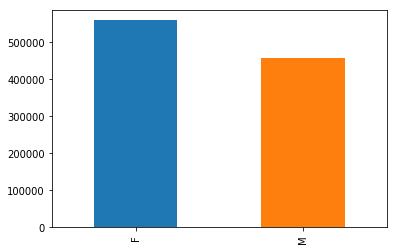

In [6]:
#2) Show the distribution of male and female
data1['Gender'].value_counts().plot(kind = 'bar')

In [7]:
#3) Show the top 5 most preferred names
import numpy as np
data_name = data1["Name"].value_counts()
data_name.head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [9]:
# 4) What is the median name occurrence in the dataset
#data1.columns
data1['Count'].median()
data1.groupby('Name')['Count'].median()

Name
Aaban          6.0
Aadan          5.5
Aadarsh        5.0
Aaden         10.0
Aadhav         6.0
Aadhya         8.0
Aadi           7.0
Aadin          5.0
Aadit          6.0
Aaditya        6.0
Aadya          7.0
Aadyn          6.0
Aahan          7.0
Aahana         7.0
Aahil          7.0
Aahna          7.0
Aaiden         8.5
Aaima          5.0
Aakash         6.0
Aalaya         5.0
Aalayah        5.0
Aaleah         5.0
Aaleyah        6.0
Aalia          5.0
Aaliah         9.0
Aalijah        5.0
Aaliya         6.0
Aaliyah       58.0
Aaliyha        5.0
Aalyah         7.5
              ... 
Zyir           5.0
Zyire          5.0
Zykeria        9.0
Zykeriah       5.0
Zykerria       7.0
Zykia          7.5
Zykierra       5.0
Zykira         7.0
Zykiria        5.5
Zyla           6.0
Zylah          6.0
Zylan          5.5
Zylen          6.0
Zyler          6.0
Zymari         5.0
Zymarion       5.0
Zymere         8.0
Zymier         5.0
Zymiere        5.0
Zymir          7.0
Zymire         5.0
Zyon   

In [11]:
# 5) Distribution of male and female born count by states
a = data1.groupby('State')['Gender'].value_counts()
print(a)

State  Gender
AK     M          2587
       F          2404
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     M          3546
       F          3255
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     M          2908
       F          28

### 2.3. Problem Statement: Use Cases on Numpy and Pandas      bachha h av
1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:
Output:
1) If the List element is a alphabet or string, the output will be
The entry is a
Oops! <class 'ValueError'> occured.
Next entry.
2) If the List element is “0”,the output will be
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.
3) If the List element is and integer except 0,then output will be:
The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer


In [174]:
def askint(randomList):
        try:
            for i in randomList:
                
        except ValueError:
            print('Non-numeric data found in the file.')

        except ImportError:
            print "NO module found"
    
        except EOFError:
            print('Why did you do an EOF on me?')

        except KeyboardInterrupt:
            print('You cancelled the operation.')

        except:
            print('An error occured.')

In [180]:
randomList = ['a', 0, 2]
askint(randomList)

The entry is a


2) Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)

#### 3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.
Note : The module created as fibo.py has to be placed in lib folder
For linux/ubuntu path = /home/anaconda/lib/python3
For Windows path = C:\Users\Ajit\Anaconda3\Lib

In [7]:
# change this value for a different result
nterms = 1000

# uncomment to take input from the user
#nterms = int(input("How many terms? "))

# first two terms
n1 = 0
n2 = 1
count = 0

# check if the number of terms is valid
if nterms <= 0:
   print("Please enter a positive integer")
elif nterms == 1:
   print("Fibonacci sequence upto",nterms,":")
   print(n1)
else:
   print("Fibonacci sequence upto",nterms,":")
   while count < nterms:
       print(n1,end=' , ')
       nth = n1 + n2
       # update values
       n1 = n2
       n2 = nth
       count += 1

Fibonacci sequence upto 1000 :
0 , 1 , 1 , 2 , 3 , 5 , 8 , 13 , 21 , 34 , 55 , 89 , 144 , 233 , 377 , 610 , 987 , 1597 , 2584 , 4181 , 6765 , 10946 , 17711 , 28657 , 46368 , 75025 , 121393 , 196418 , 317811 , 514229 , 832040 , 1346269 , 2178309 , 3524578 , 5702887 , 9227465 , 14930352 , 24157817 , 39088169 , 63245986 , 102334155 , 165580141 , 267914296 , 433494437 , 701408733 , 1134903170 , 1836311903 , 2971215073 , 4807526976 , 7778742049 , 12586269025 , 20365011074 , 32951280099 , 53316291173 , 86267571272 , 139583862445 , 225851433717 , 365435296162 , 591286729879 , 956722026041 , 1548008755920 , 2504730781961 , 4052739537881 , 6557470319842 , 10610209857723 , 17167680177565 , 27777890035288 , 44945570212853 , 72723460248141 , 117669030460994 , 190392490709135 , 308061521170129 , 498454011879264 , 806515533049393 , 1304969544928657 , 2111485077978050 , 3416454622906707 , 5527939700884757 , 8944394323791464 , 14472334024676221 , 23416728348467685 , 37889062373143906 , 613057907216115

#### 4) Write a python module script that contains ispalindrome() method to calculate the input
#### string as palindrome string or not and save it as palindrome.py.

In [5]:
string1 = input('')
string2 = []

nitin


In [6]:
if(string1 == string1[::-1]):
    string2.append(string1)
    print("String is palindrome",string2)
else:
    print("string is not palindrome")

String is palindrome ['nitin']


#### 6) Get Data from the following link:
http://files.grouplens.org/datasets/movielens/ml-20m.zip
We will be using the following files for this exercise:
ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp
movies.csv : movieId, title, genres
I. Read the dataset using pandas.
II. Extract the first row from tags and print its type.
III. Extract row 0, 11, 2000 from tags DataFrame.
IV. Print index, columns of the DataFrame.
V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify
using describe().
VI. Filter out ratings with rating > 5
VII. Find how many null values, missing values are present. Deal with them. Print out how many
rows have been modified.
VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.
IX. Find the average rating of movies.

X. Perform an inner join of movies and tags based on movieId.
XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.
XII. Split 'genres' into multiple columns.
XIII. Extract year from title e.g. (1995).
XIV. Select rows based on timestamps later than 2015-02-01.
XV. Sort the tags DataFrame based on timestamp.

In [12]:
import pandas as pd
import os

In [13]:
os.chdir('D:\DSM\Assignment6_11\ml-20m\ml-20m')
os.listdir()

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

In [14]:
#I. Read the dataset using pandas.
ratings = pd.read_csv('D:\\DSM\\Assignment6_11\\ml-20m\\ml-20m\\ratings.csv')
movies = pd.read_csv('D:\\DSM\\Assignment6_11\\ml-20m\\ml-20m\\movies.csv')
tags = pd.read_csv('D:\\DSM\\Assignment6_11\\ml-20m\\ml-20m\\tags.csv')

In [15]:
ratings.head(5)
#movies.head(5)
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [16]:
#II. Extract the first row from tags and print its type.
tags.loc[[1]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 4 columns):
userId       1 non-null int64
movieId      1 non-null int64
tag          1 non-null object
timestamp    1 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.0+ bytes


In [17]:
# III. Extract row 0, 11, 2000 from tags DataFrame.
tags.loc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


In [18]:
# IV. Print index, columns of the DataFrame.
print(tags.index)
print(tags.columns)

RangeIndex(start=0, stop=465564, step=1)
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [19]:
# V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().
print('Total sum',ratings['rating'].sum())    #total sum of ratings
print('Total count',ratings['rating'].count())   #count 
print('Mean of rating',ratings['rating'].mean())   #mean of ratings
print('Median of rating',ratings['rating'].median())  #median of ratings
   #print(ratings['rating'].cumsum())  #total sum of rating row from top to dowm
print('Minimum value of rating',ratings['rating'].min())     # mininmum rating   
print('Maximamum value of rating',ratings['rating'].max())     #maximum rating
print('Variance of rating',ratings['rating'].var())     # varience of rating
print('Standard deviation',ratings['rating'].std())     #standard deviation of rating
print('Skewness of rating',ratings['rating'].skew())     #skewness of rating
print('Kurtosis of rating',ratings['rating'].kurt())     #kurtosis of rating

   #Verify using describe()
ratings['rating'].describe()

Total sum 70511498.5
Total count 20000263
Mean of rating 3.5255285642993797
Median of rating 3.5
Minimum value of rating 0.5
Maximamum value of rating 5.0
Variance of rating 1.1066806862788214
Standard deviation 1.051988919275684
Skewness of rating -0.6553111860940569
Kurtosis of rating 0.137466831577302


count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [20]:
# VI. Filter out ratings with rating >= 5
r = ratings.loc[(ratings['rating'] >= 5)]
r['rating'].value_counts()

5.0    2898660
Name: rating, dtype: int64

In [21]:
#VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.
print(ratings.isna().sum())     # find the missing values and sum the total missing values
print(movies.isna().sum())      # find the missing values and sum the total missing values
print(tags.isna().sum())        

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [22]:
#tags.columns
print(tags['movieId'].isna().sum())
print(tags['tag'].isna().sum())        #only tag attribute having the missing values in tags
print(tags['timestamp'].isna().sum())

0
16
0


In [24]:
 # compute the missing values with mean
tags['tag'].fillna("no tag",inplace = True)
print(tags['tag'].isna().sum()) 

0


In [25]:
# VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

movies[movies['genres'].str.contains('Animation')].head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [26]:
#IX. Find the average rating of movies.
movie = pd.merge(movies, ratings, on='movieId', how='left')
print(movie.head())
print(movie['rating'].mean())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating     timestamp  
0     3.0     4.0  9.449194e+08  
1     6.0     5.0  8.582755e+08  
2     8.0     4.0  8.339819e+08  
3    10.0     4.0  9.434979e+08  
4    11.0     4.5  1.230859e+09  
3.5255285642993797


In [27]:
# X. Perform an inner join of movies and tags based on movieId.
df = pd.merge(movies,tags, on = 'movieId', how = 'inner')
df.head(4)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770


In [28]:
# XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.
movie[(movie['genres'].str.contains('Comedy')) & (movie['rating'] > 4)].head(5)

,movieId,title,genres,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,8.582755e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,1.230859e+09
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.5,1.225311e+09
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,5.0,8.551766e+08
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34.0,5.0,8.465094e+08


In [ ]:
# XII. Split 'genres' into multiple columns.
movies[['Adventure','Animation','Comedy','Children','Fantasy']] = movies.genres.apply(lambda x: pd.Series(str(x).split("|"))) 
   
#print(movie)

In [ ]:
XV. Sort the tags DataFrame based on timestamp.
tags['timestamp'].sort()

### 2.4. Problem Statement: Matplotlib
#### Matplotlib:

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [33]:
import pandas as pd
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url,skip_blank_lines = True)

In [136]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [127]:
#1. Create a pie chart presenting the male/female proportion

import pandas as pd
import numpy as np
sex_count = titanic['sex'].value_counts()
sex_count

male      843
female    466
Name: sex, dtype: int64

In [128]:
t_count = len(titanic['sex'])
sex_ratio = (sex_count/t_count)*100
print(round(sex_ratio.male),'%')
print(round(sex_ratio.female),'%')

64.0 %
36.0 %


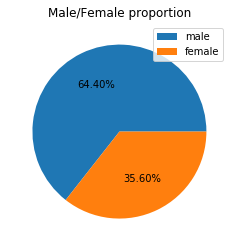

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(sex_ratio,autopct = '%.2f%%')
plt.title('Male/Female proportion')
plt.legend({'male' : 'b','female': 'y'})

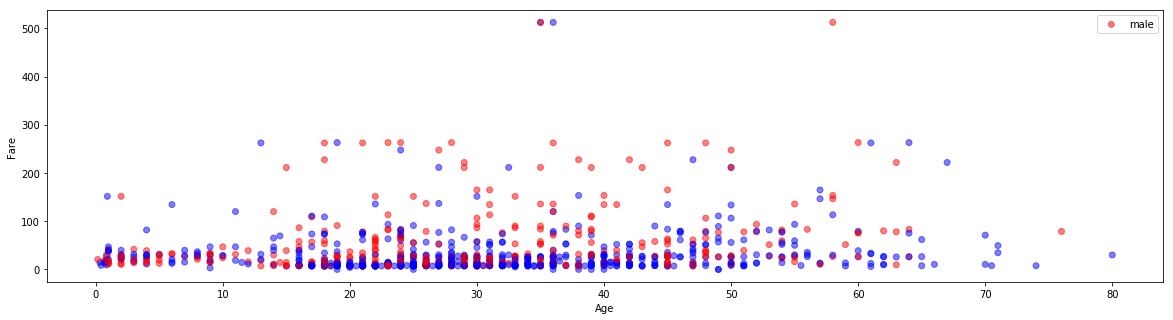

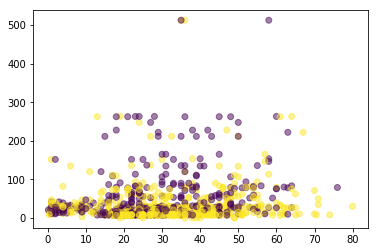

In [124]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

import matplotlib.pyplot as plt
%matplotlib inline

titanic = titanic.dropna(subset = ['sex'])
colors = {'male':'b','female':'r'}
plt.figure(figsize=[20,5])
plt.scatter(titanic['age'],titanic['fare'],alpha = 0.5,  c = titanic['sex'].map(colors))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(colors)
plt.show()

#or

print(plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=pd.factorize(titanic['sex'])[0]))

In [ ]:
2.5. Problem Statement: Data Cleaning
It happens all the time: someone gives you data containing malformed strings, Python, lists
and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [3]:
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#### 1. Some values in the the FlightNumber column are missing. These numbers are meant to
#### increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
#### numbers and make the column an integer column (instead of a float column).

In [24]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int) #Makes 'FlightNumber' column values increase by 10 as stated in question and makes column an integer column
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


#### 2. The From_To column would be better as two separate columns! Split each string on the
#### underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
#### correct column names to this temporary DataFrame.

In [25]:
temporary_df  = df["From_To"].str.split('_', expand=True) #Splits each string by '_' in 'From_To' column of the given df and assigns to temporary_df
temporary_df.columns = ['From', 'To'] #Creates two column name with 'From' and 'To'
temporary_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
#### Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [26]:
temporary_df['From'] = temporary_df['From'].str.capitalize() #Capitalises 'From' column
temporary_df['To'] = temporary_df['To'].str.capitalize() #Capitalises 'To' column
temporary_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


#### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [27]:
df.drop('From_To', axis=1, inplace = True) #Deletes 'From_To' column from dataframe
df = df.join(temporary_df) #Joins temporary_df to df
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


#### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
#### would like each first value in its own column, each second value in its own column, and so on. If
#### there isn't an Nth value, the value should be NaN.
#### Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
#### delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [29]:
delays_series = df['RecentDelays'].apply(pd.Series) 
delays_series.columns = ['delay_{}'.format(i) for i in range(1, len(delays_series.columns)+1)] #Assigns delays_series columns title
df = df.drop('RecentDelays', axis=1).join(delays_series) #Removes 'RecentDelays' column and joins with delays_series columns 
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


### 2.6. Problem Statement: Pandas SQL
Problem statement 1:
Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Rename the columns as per the description from this file:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [31]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [32]:
column_index = pd.Series(data=("age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary_class"))
column_index

0                age
1          workclass
2             fnlwgt
3          education
4      education_num
5     marital_status
6         occupation
7       relationship
8               race
9                sex
10      capital_gain
11      capital_loss
12    hours_per_week
13    native_country
14      salary_class
dtype: object

In [33]:
adult_df = df #Assigns df to adult_df
adult_df.columns = column_index #Assigns coulmn_index to adult_df columns
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Create a sql db from adult dataset and name it sqladb

In [34]:
import sqlite3

connection = sqlite3.connect(':memory:')
cur = connection.cursor()
adult_df.to_sql("sqladb", connection)

#### 1. Select 10 records from the adult sqladb

In [35]:
select_ten_record_query = 'SELECT * FROM sqladb LIMIT 10;' #Select query
cur.execute(select_ten_record_query) #Executes select query
cur.fetchall() #Fetches all data

[(0,
  50,
  ' Self-emp-not-inc',
  83311,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  0,
  0,
  13,
  ' United-States',
  ' <=50K'),
 (1,
  38,
  ' Private',
  215646,
  ' HS-grad',
  9,
  ' Divorced',
  ' Handlers-cleaners',
  ' Not-in-family',
  ' White',
  ' Male',
  0,
  0,
  40,
  ' United-States',
  ' <=50K'),
 (2,
  53,
  ' Private',
  234721,
  ' 11th',
  7,
  ' Married-civ-spouse',
  ' Handlers-cleaners',
  ' Husband',
  ' Black',
  ' Male',
  0,
  0,
  40,
  ' United-States',
  ' <=50K'),
 (3,
  28,
  ' Private',
  338409,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Prof-specialty',
  ' Wife',
  ' Black',
  ' Female',
  0,
  0,
  40,
  ' Cuba',
  ' <=50K'),
 (4,
  37,
  ' Private',
  284582,
  ' Masters',
  14,
  ' Married-civ-spouse',
  ' Exec-managerial',
  ' Wife',
  ' White',
  ' Female',
  0,
  0,
  40,
  ' United-States',
  ' <=50K'),
 (5,
  49,
  ' Private',
  160187,
  ' 9th',
  5,
  ' Married-spo

#### 2. Show me the average hours per week of all men who are working in private sector

In [36]:
avg_hours_per_week_worked_men_private_sector_query = '''SELECT AVG(hours_per_week) FROM sqladb WHERE workclass = ' Private' AND sex = ' Male';'''
cur.execute(avg_hours_per_week_worked_men_private_sector_query)
cur.fetchall()

[(42.22122591006424,)]

#### 3. Show me the frequency table for education, occupation and relationship, separately

In [37]:
print("Frequency table for education: ")
frequency_table_for_education_query = ''' SELECT education, COUNT(education) AS frequency FROM sqladb GROUP BY education;'''
cur.execute(frequency_table_for_education_query)
cur.fetchall()

Frequency table for education: 


[(' 10th', 933),
 (' 11th', 1175),
 (' 12th', 433),
 (' 1st-4th', 168),
 (' 5th-6th', 333),
 (' 7th-8th', 646),
 (' 9th', 514),
 (' Assoc-acdm', 1067),
 (' Assoc-voc', 1382),
 (' Bachelors', 5354),
 (' Doctorate', 413),
 (' HS-grad', 10501),
 (' Masters', 1723),
 (' Preschool', 51),
 (' Prof-school', 576),
 (' Some-college', 7291)]

#### 4. Are there any people who are married, working in private sector and having a master’s degree

In [38]:
print("Frequency table for occupation: ")
frequency_table_for_occupation_query = ''' SELECT occupation, COUNT(occupation) AS frequency FROM sqladb GROUP BY occupation;'''
cur.execute(frequency_table_for_occupation_query)
cur.fetchall()

Frequency table for occupation: 


[(' ?', 1843),
 (' Adm-clerical', 3769),
 (' Armed-Forces', 9),
 (' Craft-repair', 4099),
 (' Exec-managerial', 4066),
 (' Farming-fishing', 994),
 (' Handlers-cleaners', 1370),
 (' Machine-op-inspct', 2002),
 (' Other-service', 3295),
 (' Priv-house-serv', 149),
 (' Prof-specialty', 4140),
 (' Protective-serv', 649),
 (' Sales', 3650),
 (' Tech-support', 928),
 (' Transport-moving', 1597)]

In [39]:
print("Frequency table for relationship: ")
frequency_table_for_relationship_query = ''' SELECT relationship, COUNT(relationship) AS frequency FROM sqladb GROUP BY relationship;'''
cur.execute(frequency_table_for_relationship_query)
cur.fetchall()

Frequency table for relationship: 


[(' Husband', 13193),
 (' Not-in-family', 8304),
 (' Other-relative', 981),
 (' Own-child', 5068),
 (' Unmarried', 3446),
 (' Wife', 1568)]

In [40]:
count_people_married_working_private_sector_masters_degree_query = '''SELECT COUNT(*) FROM sqladb
                                                                    WHERE marital_status=' Married-AF-spouse'
                                                                    or marital_status=' Married-civ-spouse'
                                                                    or marital_status=' Married-spouse-absent'
                                                                    or marital_status=' Separated'
                                                                    or marital_status=' Widowed'
                                                                    and workclass = ' Private'
                                                                    and education= ' Masters'; '''
cur.execute(count_people_married_working_private_sector_masters_degree_query)
result = cur.fetchall()
result

[(16455,)]

In [41]:
print("Yes" if result[0][0] > 0 else "No") #Checks if there any people who are married, working in private sector and having a masters degree

Yes


#### 5. What is the average, minimum and maximum age group for people working in different sectors

In [42]:
select_avg_min_max_age_group_working_query = ''' SELECT workclass, AVG(age), MIN(age), MAX(age) FROM sqladb GROUP BY workclass;'''
cur.execute(select_avg_min_max_age_group_working_query)
cur.fetchall()

[(' ?', 40.960239651416124, 17, 90),
 (' Federal-gov', 42.590625, 17, 90),
 (' Local-gov', 41.75107501194458, 17, 90),
 (' Never-worked', 20.571428571428573, 17, 30),
 (' Private', 36.797585477617204, 17, 90),
 (' Self-emp-inc', 46.01702508960574, 17, 84),
 (' Self-emp-not-inc', 44.96969696969697, 17, 90),
 (' State-gov', 39.43639167309175, 17, 81),
 (' Without-pay', 47.785714285714285, 19, 72)]

#### 6. Calculate age distribution by country



In [43]:
select_age_distribution_by_country_query = ''' SELECT age, native_country, COUNT(*) FROM sqladb GROUP BY age, native_country;'''
cur.execute(select_age_distribution_by_country_query)
cur.fetchall()

[(17, ' ?', 2),
 (17, ' Canada', 2),
 (17, ' El-Salvador', 2),
 (17, ' England', 1),
 (17, ' Haiti', 1),
 (17, ' India', 1),
 (17, ' Mexico', 6),
 (17, ' Peru', 2),
 (17, ' Philippines', 1),
 (17, ' Poland', 1),
 (17, ' Puerto-Rico', 1),
 (17, ' Trinadad&Tobago', 1),
 (17, ' United-States', 374),
 (18, ' ?', 8),
 (18, ' Cambodia', 1),
 (18, ' Canada', 1),
 (18, ' Columbia', 1),
 (18, ' Dominican-Republic', 1),
 (18, ' Germany', 1),
 (18, ' Honduras', 1),
 (18, ' India', 1),
 (18, ' Jamaica', 1),
 (18, ' Mexico', 6),
 (18, ' Peru', 1),
 (18, ' Philippines', 2),
 (18, ' Scotland', 1),
 (18, ' United-States', 524),
 (19, ' ?', 5),
 (19, ' Canada', 1),
 (19, ' El-Salvador', 4),
 (19, ' England', 2),
 (19, ' Guatemala', 3),
 (19, ' Haiti', 1),
 (19, ' Honduras', 1),
 (19, ' Hong', 1),
 (19, ' Italy', 1),
 (19, ' Jamaica', 1),
 (19, ' Japan', 2),
 (19, ' Laos', 2),
 (19, ' Mexico', 14),
 (19, ' Nicaragua', 2),
 (19, ' Philippines', 2),
 (19, ' Portugal', 1),
 (19, ' Puerto-Rico', 3),
 (19, '

#### 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital-loss'

In [44]:
compute_net_capital_gain_query = '''SELECT capital_gain-capital_loss as Net_Capital_Gain FROM sqladb;'''
cur.execute(compute_net_capital_gain_query)
cur.fetchall()

[(0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (14084,),
 (5178,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-2042,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-1408,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-1902,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (5013,),
 (2407,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (14344,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-1573,),
 (0,),
 (0,),
 (-1902,),
 (0,),
 (0,),
 (0,),
 (0,),
 (15024,),
 (0,),
 (0,),
 (0,),
 (7688,),
 (34095,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-1887,),
 (4064,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-1719,),
 (0,),
 (0,),
 (0,),
 (0,),
 (-1762,),
 (4386,),
 (0,),
 (0

In [ ]:
Problem statement 2:
Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Note: Solution submitted via github must contain all the detailed steps.

#### 1. Create an sqlalchemy engine using a sample from the data set

In [45]:
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base

engine = create_engine('sqlite://', echo=False)
connection = engine.raw_connection()
base = declarative_base()

df.to_sql('dfdata', connection, if_exists='replace')

#### 2. Write two basic update queries

In [46]:
update_query_1 = '''UPDATE dfdata SET hours_per_week = 20 WHERE age = 50;''' #First update query
update_query_2 = '''UPDATE dfdata SET capital_gain = 10 WHERE education = ' HS-grad';''' #Second update query
select_query = '''SELECT * FROM dfdata LIMIT 5;''' #Select query 

engine.execute(update_query_1) #Executes first update query
engine.execute(update_query_2) #Executes second update query

engine.execute(select_query).fetchall() #Executes select query

[(0, 50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 20, ' United-States', ' <=50K'),
 (1, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 10, 0, 40, ' United-States', ' <=50K'),
 (2, 53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K'),
 (3, 28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K'),
 (4, 37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K')]

#### 3. Write two delete queries

In [47]:
delete_query_1 = '''DELETE FROM dfdata WHERE age = 53;''' #First delete query
delete_query_2 = '''DELETE FROM dfdata WHERE education = ' Bachelors';''' #Second delete query
select_query = '''SELECT * FROM dfdata LIMIT 5;''' #Select query

engine.execute(delete_query_1) #Executes first delete query
engine.execute(delete_query_2) #Executes second delete query

engine.execute(select_query).fetchall() #Executes select query and fetches all data

[(1, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 10, 0, 40, ' United-States', ' <=50K'),
 (4, 37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'),
 (5, 49, ' Private', 160187, ' 9th', 5, ' Married-spouse-absent', ' Other-service', ' Not-in-family', ' Black', ' Female', 0, 0, 16, ' Jamaica', ' <=50K'),
 (6, 52, ' Self-emp-not-inc', 209642, ' HS-grad', 9, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 10, 0, 45, ' United-States', ' >50K'),
 (7, 31, ' Private', 45781, ' Masters', 14, ' Never-married', ' Prof-specialty', ' Not-in-family', ' White', ' Female', 14084, 0, 50, ' United-States', ' >50K')]

#### 4. Write two filter queries

In [48]:
filter_query_1 = '''SELECT * FROM dfdata WHERE education = ' Masters' LIMIT 5;''' #First filter query
engine.execute(filter_query_1).fetchall() #Executes fiter query and fetches all data

[(4, 37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'),
 (7, 31, ' Private', 45781, ' Masters', 14, ' Never-married', ' Prof-specialty', ' Not-in-family', ' White', ' Female', 14084, 0, 50, ' United-States', ' >50K'),
 (18, 43, ' Self-emp-not-inc', 292175, ' Masters', 14, ' Divorced', ' Exec-managerial', ' Unmarried', ' White', ' Female', 0, 0, 45, ' United-States', ' >50K'),
 (46, 44, ' Private', 128354, ' Masters', 14, ' Divorced', ' Exec-managerial', ' Unmarried', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'),
 (86, 33, ' Private', 202051, ' Masters', 14, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 50, ' United-States', ' <=50K')]

In [49]:
filter_query_2 = '''SELECT * FROM dfdata WHERE marital_status = ' Never-married' LIMIT 5;''' #Second filter query
engine.execute(filter_query_2).fetchall() #Executes filter query and fetches all data

[(7, 31, ' Private', 45781, ' Masters', 14, ' Never-married', ' Prof-specialty', ' Not-in-family', ' White', ' Female', 14084, 0, 50, ' United-States', ' >50K'),
 (12, 32, ' Private', 205019, ' Assoc-acdm', 12, ' Never-married', ' Sales', ' Not-in-family', ' Black', ' Male', 0, 0, 50, ' United-States', ' <=50K'),
 (15, 25, ' Self-emp-not-inc', 176756, ' HS-grad', 9, ' Never-married', ' Farming-fishing', ' Own-child', ' White', ' Male', 10, 0, 35, ' United-States', ' <=50K'),
 (16, 32, ' Private', 186824, ' HS-grad', 9, ' Never-married', ' Machine-op-inspct', ' Unmarried', ' White', ' Male', 10, 0, 40, ' United-States', ' <=50K'),
 (25, 19, ' Private', 168294, ' HS-grad', 9, ' Never-married', ' Craft-repair', ' Own-child', ' White', ' Male', 10, 0, 40, ' United-States', ' <=50K')]

#### 5. Write two function queries

In [50]:
function_query_1 = '''SELECT MIN(age) FROM dfdata WHERE relationship = ' Husband' LIMIT 5;''' #First function query
engine.execute(function_query_1).fetchall() #Executes function query and fetches all data

[(17,)]

In [51]:
function_query_2 = '''SELECT AVG(age) FROM dfdata WHERE education =' Masters' LIMIT 5;''' #Second function query
engine.execute(function_query_2).fetchall() #Executes function query and fetches all data

[(43.804412641621944,)]

## FINISH!!!